In [1]:
import sys
import BNN
import torch
import matplotlib.pyplot as plt

In [6]:
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.002*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)


net = BNN.BayesianNN(n_feature=1,n_hidden=20,n_output=1)
net.maximum_likelyhood(x,y,n_iterations=300)

Number of Model Parameters:  61


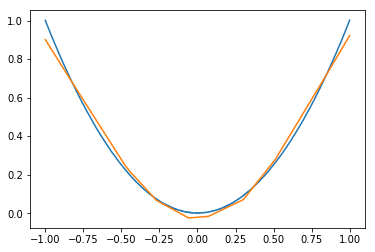

In [9]:
plt.plot(x.data.numpy(),y.data.numpy())
plt.plot(x.data.numpy(),net.return_prediction(x).data.numpy())

In [10]:
#print(type(net.net.named_parameters()))

print(net.convert_model_weights_into_vector())

[ 0.95191145  0.91060901  0.89536965  0.27446711 -0.67608291  0.59415448
 -0.24421971 -0.94615775  0.98589879 -0.19631457  0.88901258  0.4172906
 -0.70601237 -1.03114092 -0.3421202  -0.93436217 -0.16299772  0.78647035
 -0.67120004  0.251055   -0.28731015 -0.46170619 -0.98611915 -0.99776101
 -0.30400479 -0.62178218 -0.14242868 -0.0558886   0.26686174 -0.39866507
  0.421422    0.49183014 -0.96378446  0.30645242  0.6647256   0.0660143
 -0.23415363 -0.62524354 -0.57130802 -0.97434485  0.32869342  0.34649074
  0.11972934 -0.06530295  0.22567131  0.09761924  0.0628978   0.52018237
  0.43541428 -0.12768094  0.23884569 -0.1684287   0.10014471  0.29069424
 -0.30106661  0.33792728  0.19322526  0.03847674  0.02797223  0.04751292
 -0.06633648]


In [21]:
print(net.net.hidden.weight.data.numpy().flatten())
print(net.net.hidden.bias.data.numpy().flatten())

print(net.net.predict.weight.data.numpy().flatten())
print(net.net.predict.bias.data.numpy())

[ 0.95191145  0.91060901  0.89536965  0.27446711 -0.67608291  0.59415448
 -0.24421971 -0.94615775  0.98589879 -0.19631457  0.88901258  0.4172906
 -0.70601237 -1.03114092 -0.3421202  -0.93436217 -0.16299772  0.78647035
 -0.67120004  0.251055  ]
[-0.28731015 -0.46170619 -0.98611915 -0.99776101 -0.30400479 -0.62178218
 -0.14242868 -0.0558886   0.26686174 -0.39866507  0.421422    0.49183014
 -0.96378446  0.30645242  0.6647256   0.0660143  -0.23415363 -0.62524354
 -0.57130802 -0.97434485]
[ 0.32869342  0.34649074  0.11972934 -0.06530295  0.22567131  0.09761924
  0.0628978   0.52018237  0.43541428 -0.12768094  0.23884569 -0.1684287
  0.10014471  0.29069424 -0.30106661  0.33792728  0.19322526  0.03847674
  0.02797223  0.04751292]
[-0.06633648]
